In [1]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(theta, m, x):
    return np.cos(m*theta - x*np.sin(theta))

In [3]:
def J(m, x):
    if type(x) == np.ndarray:
        I = np.zeros(x.shape)
        for index, val in np.ndenumerate(x):
            I[index] = integrate.quad(f, 0, np.pi, args = (m, val))[0]
    else:
        I = integrate.quad(f, 0, np.pi, args = (m, x))[0]
    return I/np.pi

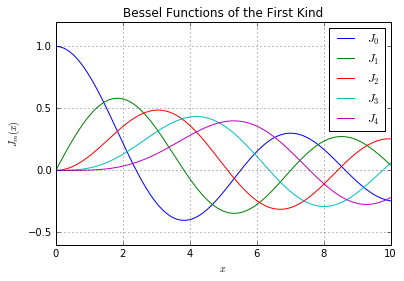

In [4]:
x = np.linspace(0,10,1000)
[plt.plot(x, J(m,x), label = '$J_'+str(m)+'$') for m in range(5)]
plt.legend()
plt.title('Bessel Functions of the First Kind')
plt.xlabel('$x$')
plt.ylabel('$J_m(x)$')
plt.grid()
plt.show()

In [5]:
def I(x, y, a, wl, R, I0):
    q = np.sqrt(x**2 + y**2)
    z = 2 * np.pi * a * q / (wl * R)
    return I0 * (2 * J(1, z) / z)**2

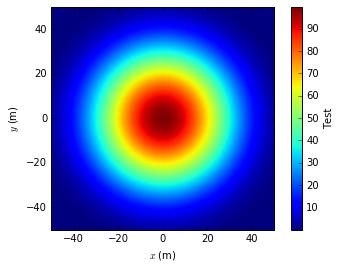

In [10]:
x = np.linspace(-50,50,100)
xv, yv = np.meshgrid(x, x)
vals = I(xv, yv, 100, 100, 100, 100)
plt.imshow(vals, extent=[-50,50,-50,50])
plt.xlabel('$x$ (cm)')
plt.ylabel('$y$ (cm)')
clrbar = plt.colorbar()
clrbar.set_label('Test')
plt.show()